# Saudi Arabia Weather Forecasting:
- Part 3: Forecast weather temperature for multiple Saudi cities on certain date **(Multivariate time series forecasting).**

_Auther: Esraa Madi_


-------

In [11]:
# import libs
import pandas as pd
import pickle
import io
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [12]:
def plot_series(time, series, fig_title, x_label="Time", y_label="Value", format="-", start=0, end=None):
    """Function to plot time series data"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.grid(True)

In [10]:
# ask access for read file from drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# load cleaned data 
infile = open('/content/gdrive/My Drive/Colab Notebooks/datasets/clean_cities_dataset','rb')
df_cities_lst = pickle.load(infile)
cities = pickle.load(infile)
infile.close()

In [13]:
# or just load it from local
from google.colab import files
infile = files.upload()

Saving clean_cities_dataset to clean_cities_dataset (5)


In [14]:
file_ = io.BytesIO(infile['clean_cities_dataset'])
df_cities_lst = pickle.load(file_)
cities = pickle.load(file_)
df_all_cities = pickle.load(file_)

In [15]:
# show each city data
df_cities_lst[0].head()

,barometer,humidity,temp,visibility,wind,city,weather
2017-01-01 00:00:00,1018.0,64.0,17.0,16.0,11.0,Qassim,Clear
2017-01-01 03:00:00,1018.0,64.0,17.0,16.0,11.0,Qassim,Clear
2017-01-01 06:00:00,1018.0,64.0,17.0,16.0,11.0,Qassim,Clear
2017-01-01 09:00:00,1018.0,64.0,17.0,16.0,11.0,Qassim,Clear
2017-01-01 12:00:00,1018.0,64.0,17.0,16.0,11.0,Qassim,Clear


In [16]:
# Saudi cities
cities

['Qassim',
 'Hail',
 'Madina',
 'EP',
 'Riyadh',
 'Mecca',
 'Tabuk',
 'Assir',
 'Northern boarder',
 'Jazan',
 'Najran',
 'Baha',
 'Jawf']

In [17]:
# all cities data
df_all_cities.head()

,barometer_Qassim,humidity_Qassim,temp_Qassim,visibility_Qassim,wind_Qassim,barometer_Hail,humidity_Hail,temp_Hail,visibility_Hail,wind_Hail,barometer_Madina,humidity_Madina,temp_Madina,visibility_Madina,wind_Madina,barometer_EP,humidity_EP,temp_EP,visibility_EP,wind_EP,barometer_Riyadh,humidity_Riyadh,temp_Riyadh,visibility_Riyadh,wind_Riyadh,barometer_Mecca,humidity_Mecca,temp_Mecca,visibility_Mecca,wind_Mecca,barometer_Tabuk,humidity_Tabuk,temp_Tabuk,visibility_Tabuk,wind_Tabuk,barometer_Assir,humidity_Assir,temp_Assir,visibility_Assir,wind_Assir,barometer_Northern_boarder,humidity_Northern_boarder,temp_Northern_boarder,visibility_Northern_boarder,wind_Northern_boarder,barometer_Jazan,humidity_Jazan,temp_Jazan,visibility_Jazan,wind_Jazan,barometer_Najran,humidity_Najran,temp_Najran,visibility_Najran,wind_Najran,barometer_Baha,humidity_Baha,temp_Baha,visibility_Baha,wind_Baha,barometer_Jawf,humidity_Jawf,temp_Jawf,visibility_Jawf,wind_Jawf
2017-01-01 00:00:00,1018.0,64.0,17.0,16.0,11.0,1018.0,64.0,17.0,16.0,11.0,1020.0,33.0,21.0,16.0,0.0,1015.0,72.0,16.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,1016.0,69.0,22.0,16.0,7.0,1021.0,37.0,10.0,-1.0,11.0,1026.0,100.0,12.0,16.0,7.0,1020.0,58.0,12.0,16.0,4.0,1026.0,100.0,12.0,16.0,7.0,1026.0,100.0,12.0,16.0,7.0,1023.0,59.0,15.0,16.0,0.0,1022.0,43.0,10.0,16.0,7.0
2017-01-01 03:00:00,1018.0,64.0,17.0,16.0,11.0,1018.0,64.0,17.0,16.0,11.0,1020.0,33.0,21.0,16.0,0.0,1015.0,72.0,16.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,1016.0,69.0,22.0,16.0,7.0,1021.0,37.0,10.0,-1.0,11.0,1026.0,100.0,12.0,16.0,7.0,1020.0,58.0,12.0,16.0,4.0,1026.0,100.0,12.0,16.0,7.0,1026.0,100.0,12.0,16.0,7.0,1023.0,59.0,15.0,16.0,0.0,1022.0,43.0,10.0,16.0,7.0
2017-01-01 06:00:00,1018.0,64.0,17.0,16.0,11.0,1018.0,64.0,17.0,16.0,11.0,1020.0,33.0,21.0,16.0,0.0,1015.0,72.0,16.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,1016.0,69.0,22.0,16.0,7.0,1021.0,37.0,10.0,-1.0,11.0,1026.0,100.0,12.0,16.0,7.0,1020.0,58.0,12.0,16.0,4.0,1026.0,100.0,12.0,16.0,7.0,1026.0,100.0,12.0,16.0,7.0,1023.0,59.0,15.0,16.0,0.0,1022.0,43.0,10.0,16.0,7.0
2017-01-01 09:00:00,1018.0,64.0,17.0,16.0,11.0,1018.0,64.0,17.0,16.0,11.0,1020.0,33.0,21.0,16.0,0.0,1015.0,72.0,16.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,1016.0,69.0,22.0,16.0,7.0,1021.0,37.0,10.0,-1.0,11.0,1026.0,100.0,12.0,16.0,7.0,1020.0,58.0,12.0,16.0,4.0,1026.0,100.0,12.0,16.0,7.0,1026.0,100.0,12.0,16.0,7.0,1023.0,59.0,15.0,16.0,0.0,1022.0,43.0,10.0,16.0,7.0
2017-01-01 12:00:00,1018.0,64.0,17.0,16.0,11.0,1018.0,64.0,17.0,16.0,11.0,1020.0,33.0,21.0,16.0,0.0,1015.0,72.0,16.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,1016.0,69.0,22.0,16.0,7.0,1021.0,37.0,10.0,-1.0,11.0,1026.0,100.0,12.0,16.0,7.0,1020.0,58.0,12.0,16.0,4.0,1026.0,100.0,12.0,16.0,7.0,1026.0,100.0,12.0,16.0,7.0,1023.0,59.0,15.0,16.0,0.0,1022.0,43.0,10.0,16.0,7.0


In [18]:
 # let's forecast weather temperatures of cities
 
 # get temperature columns
 regx_temperature = r'(temp_[A-Za-z_]+)'
 temp_cols = []
 for col_name in df_all_cities.columns:
     match_col = re.findall( regx_temperature , col_name)
     if len(match_col) > 0 :
         temp_cols.append(match_col[0])

In [19]:
 temp_cols

['temp_Qassim',
 'temp_Hail',
 'temp_Madina',
 'temp_EP',
 'temp_Riyadh',
 'temp_Mecca',
 'temp_Tabuk',
 'temp_Assir',
 'temp_Northern_boarder',
 'temp_Jazan',
 'temp_Najran',
 'temp_Baha',
 'temp_Jawf']

In [20]:
 # south cities
 south_cities_temp = df_all_cities[['temp_Assir', 'temp_Jazan', 'temp_Najran', 'temp_Baha']]
 south_cities_temp.head()

,temp_Assir,temp_Jazan,temp_Najran,temp_Baha
2017-01-01 00:00:00,12.0,12.0,12.0,15.0
2017-01-01 03:00:00,12.0,12.0,12.0,15.0
2017-01-01 06:00:00,12.0,12.0,12.0,15.0
2017-01-01 09:00:00,12.0,12.0,12.0,15.0
2017-01-01 12:00:00,12.0,12.0,12.0,15.0


In [21]:
# number of rows we have for all cities
south_cities_temp.shape

(6793, 4)

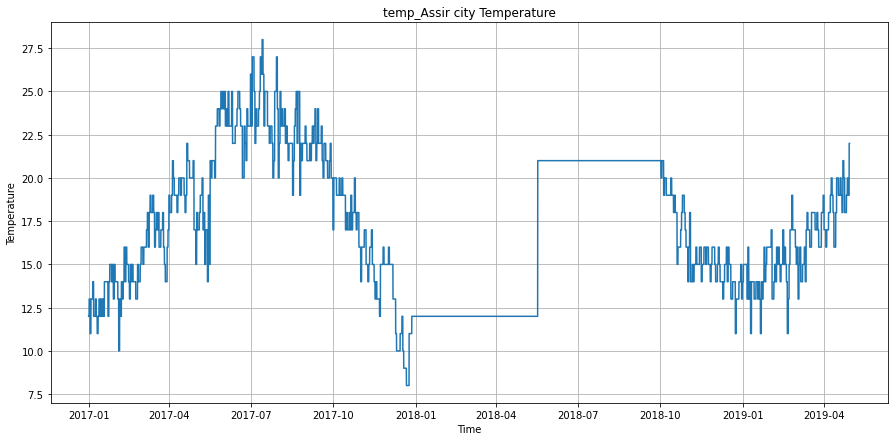

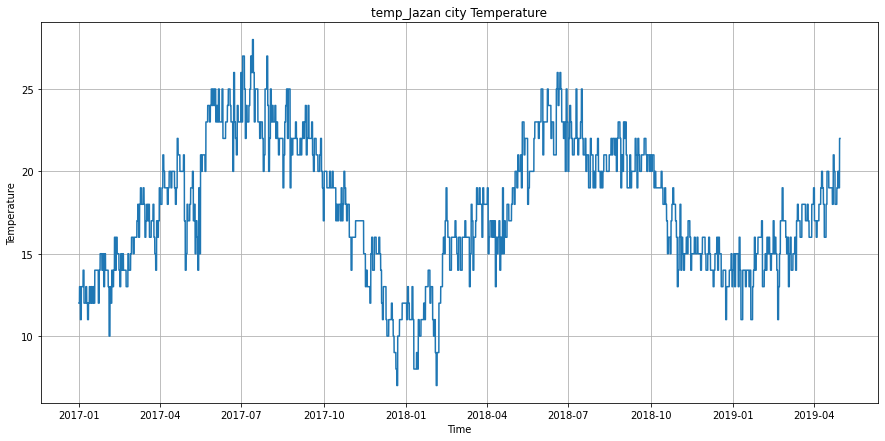

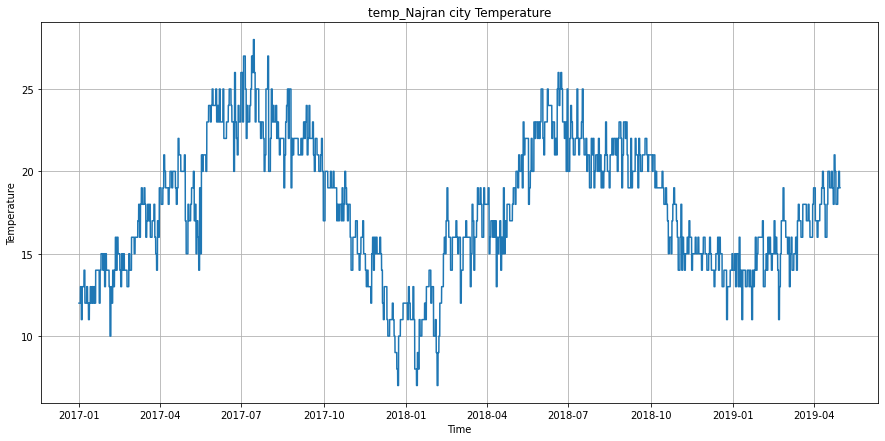

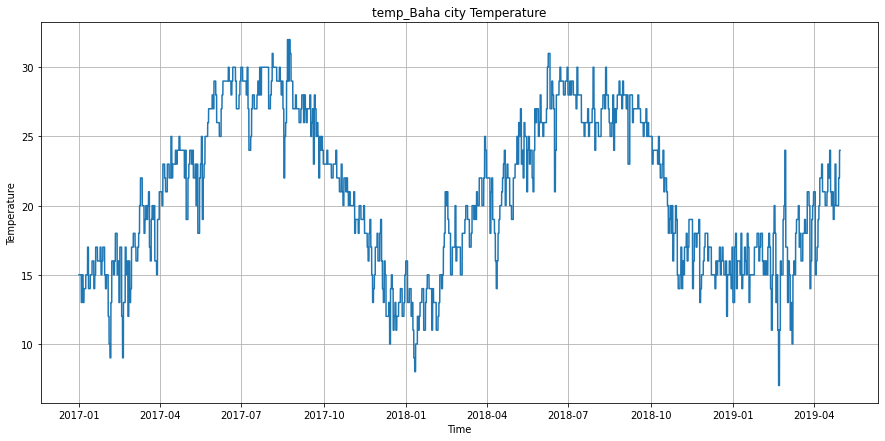

In [22]:
# weather data
series = south_cities_temp.values
time = np.array(south_cities_temp.index)

# plot Baha weather info
for ind, city in enumerate(south_cities_temp.columns):
    plt.figure(figsize=(15, 7))
    plot_series(time, series[:, ind], fig_title=f"{city} city Temperature", y_label="Temperature")
    plt.show()

In [23]:
 # north cities
 north_cities_temp = df_all_cities[['temp_Madina', 'temp_Tabuk', 'temp_Northern_boarder','temp_Jawf']]
 north_cities_temp.head()

,temp_Madina,temp_Tabuk,temp_Northern_boarder,temp_Jawf
2017-01-01 00:00:00,21.0,10.0,12.0,10.0
2017-01-01 03:00:00,21.0,10.0,12.0,10.0
2017-01-01 06:00:00,21.0,10.0,12.0,10.0
2017-01-01 09:00:00,21.0,10.0,12.0,10.0
2017-01-01 12:00:00,21.0,10.0,12.0,10.0


In [24]:
# number of rows we have for all cities
north_cities_temp.shape

(6793, 4)

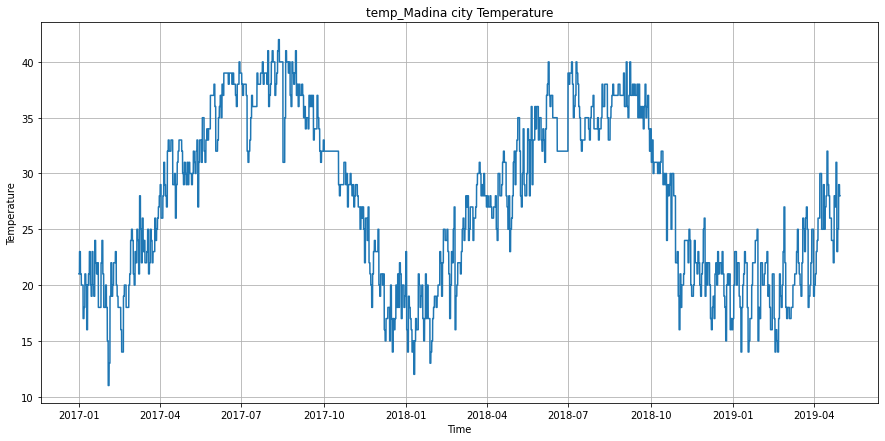

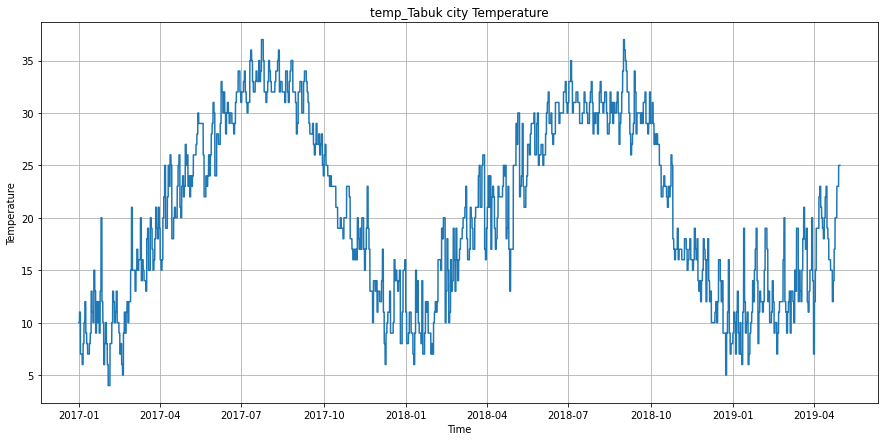

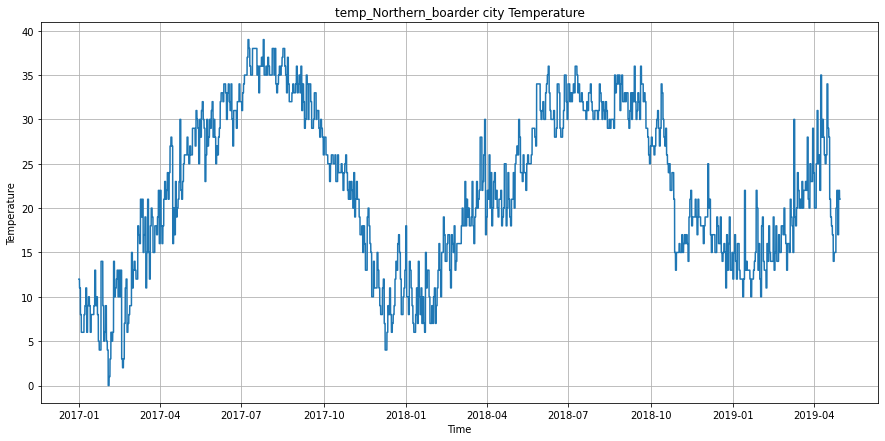

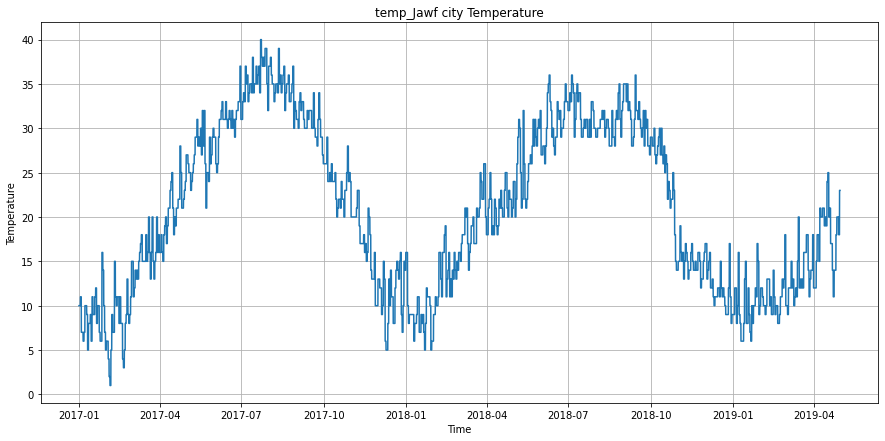

In [25]:
# weather data
series = north_cities_temp.values
time = np.array(north_cities_temp.index)

# plot Baha weather info
for ind, city in enumerate(north_cities_temp.columns):
    plt.figure(figsize=(15, 7))
    plot_series(time, series[:, ind], fig_title=f"{city} city Temperature", y_label="Temperature")
    plt.show()

In [24]:
# let's start by forecasting north cities

In [26]:
# split our data to train and text data
split_time = 4700 # where test data starts
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

# number of features (points) used to predict next point after this window
window_size = 64

# For training we need to create batches (set of rows(X) with corresponding y)
batch_size = 256

# It will just fill the buffer with the first 'shuffle_buffer_size' elements, pick one of them at random. 
# And then it will replace that with the 'shuffle_buffer_size' element and first element before randomly picking again, and so on. 
# using a shuffle buffer speeds things up a bit.
shuffle_buffer_size = 1000


In [27]:
def windowed_dataset_multivariate_var(series, window_size, batch_size, shuffle_buffer):
    '''Function used to divide our multivariate series to windows since each window contains number of points
       we will consider then as features to predict the next value after this window'''


    # create a dataset from the series using a tf.data dataset.
    ds = tf.data.Dataset.from_tensor_slices(series)

    # convert series to following form:
    # row1: 0-30 points 
    # row2: 1-31 points 
    # row3: 2-32 points and so on
    # every time we shift by one point 
    # here it add 1 to window size bcz (feature num + label)
    # drop_remainder: is useful at the end to delete last rows that don't have enough features 
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)

    # put these windows into numpy lists so that we can start using them with machine learning.
    # ex :
    # row1 (window1): 1 2 3 4 5 => [1 2 3 4 5]
    # row2 (window2): 2 3 4 5 6 => [2 3 4 5 6] and so on
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))

    # shuffle our data (rows) before training.
    ds = ds.shuffle(shuffle_buffer)

    # divide each row to 'window_size' as features and 1 as lebal
    # ex:
    # row1: [1 2 3 4 5] => [1 2 3 4] [5]
    ds = ds.map(lambda w: (w[:-1], w[1:]))

    # batch the data into sets of 'batch_size'
    return ds.batch(batch_size).prefetch(1)

In [28]:
def model_forecast_multivariate(imodel, series, window_size):
    """Function to divide series to windows then forcast next values for each window in a series data"""
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = imodel.predict(ds)
    return forecast

In [28]:
# clear tensorflow session
tf.keras.backend.clear_session()

# Setting seed to ensure reproducibility.
tf.random.set_seed(50)
np.random.seed(50)

# preprocess series data
train_set = windowed_dataset_multivariate_var(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

<PrefetchDataset shapes: ((None, None, 4), (None, None, 4)), types: (tf.float64, tf.float64)>
(4700, 4)


In [29]:
# Build deep learning model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 4]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Lambda(lambda x: x * 400)
  # The default activation function in the RNN layers is tan H which is the hyperbolic tangent activation. 
  # This outputs values between negative one and one. Since the time series values are in that order usually in 
  # the 10s like 40s, 50s, 60s, and 70s, then scaling up the outputs to the same ballpark can help us with learning
])

# change learning rate during training
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
# set optimizer
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

# compile and fit model
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


Epoch 1/100
19/19 [==============================] - 1s 26ms/step - loss: 49.9526 - mae: 50.4514 - lr: 1.0000e-08
Epoch 2/100
19/19 [==============================] - 1s 30ms/step - loss: 47.1752 - mae: 47.6738 - lr: 1.1220e-08
Epoch 3/100
19/19 [==============================] - 1s 27ms/step - loss: 43.2799 - mae: 43.7785 - lr: 1.2589e-08
Epoch 4/100
19/19 [==============================] - 1s 30ms/step - loss: 38.6232 - mae: 39.1214 - lr: 1.4125e-08
Epoch 5/100
19/19 [==============================] - 1s 27ms/step - loss: 31.1653 - mae: 31.6627 - lr: 1.5849e-08
Epoch 6/100
19/19 [==============================] - 1s 29ms/step - loss: 27.1447 - mae: 27.6412 - lr: 1.7783e-08
Epoch 7/100
19/19 [==============================] - 1s 28ms/step - loss: 25.3247 - mae: 25.8205 - lr: 1.9953e-08
Epoch 8/100
19/19 [==============================] - 1s 30ms/step - loss: 23.7735 - mae: 24.2686 - lr: 2.2387e-08
Epoch 9/100
19/19 [==============================] - 1s 27ms/step - loss: 22.6111 - mae:

(1e-08, 0.001, 0.0, 100.0)

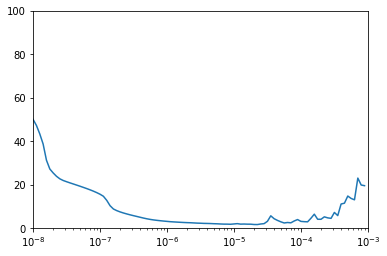

In [30]:
# plot learning rate to pick next start point for lr
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 0.001, 0, 100])

In [31]:
# forcast weather info using above model

rnn_forecast = model_forecast_multivariate(model, series, window_size)
# split_time - window_size:-1 => we forcasted whole data, so need to just pick valid data 
# -1 => it's repeated as window size, just get last value to be label
# 0 => convert [23] to 23
rnn_forecast_ = rnn_forecast[split_time - window_size:-1, -1, :]

In [32]:
# check sum shapes
print('input data shape: ', series.shape)
print('forcasted data shape: ', rnn_forecast.shape)
print('forcasted data after fixing shape: ', rnn_forecast_.shape)

input data shape:  (6793, 4)
forcasted data shape:  (6730, 64, 4)
forcasted data after fixing shape:  (2093, 4)


In [33]:
# show forcasted result (forcasting Madina temperature)
print(rnn_forecast_[:,0])

[29.390625 29.390625 29.390625 ... 29.390625 29.390625 29.390625]


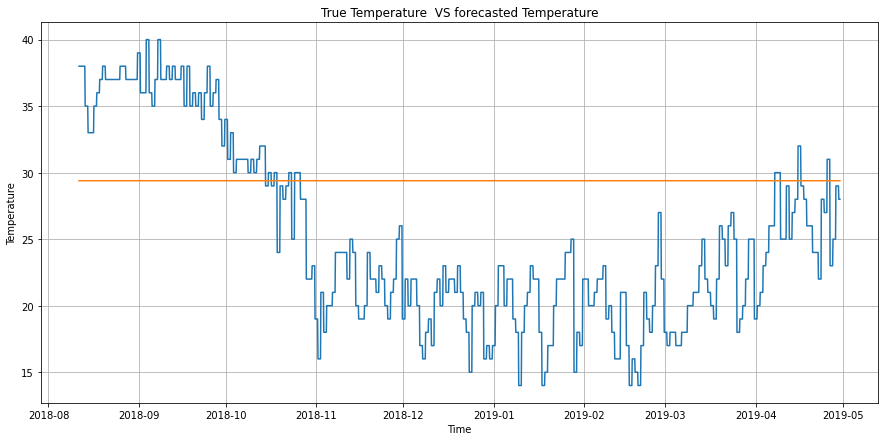

In [34]:
# plot forcasting data (forcasting Madina temperature)
plt.figure(figsize=(15, 7))
plot_series(time_valid, x_valid[:,0], fig_title="True Temperature  VS forecasted Temperature", y_label='Temperature')
plot_series(time_valid, rnn_forecast_[:,0], fig_title="True Temperature  VS forecasted Temperature", y_label='Temperature')

In [29]:
# we'll use best learning rate from figure above to build better model
# prepare new model
tf.keras.backend.clear_session()

# Setting seed to ensure reproducibility.
tf.random.set_seed(50)
np.random.seed(50)

# prepare data
window_size = 60
batch_size = 100
train_set = windowed_dataset_multivariate_var(x_train, window_size, batch_size, shuffle_buffer_size)

In [30]:
# build new model
model_m = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 4]),
  tf.keras.layers.LSTM(100, return_sequences=True),
  tf.keras.layers.LSTM(100, return_sequences=True),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer_m = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model_m.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer_m,
              metrics=["mae"])
history_m = model_m.fit(train_set,epochs=150)

Epoch 1/150
47/47 [==============================] - 1s 16ms/step - loss: 7.1348 - mae: 7.6097
Epoch 2/150
47/47 [==============================] - 1s 17ms/step - loss: 2.2349 - mae: 2.6888
Epoch 3/150
47/47 [==============================] - 1s 16ms/step - loss: 1.7580 - mae: 2.2032
Epoch 4/150
47/47 [==============================] - 1s 16ms/step - loss: 1.5676 - mae: 2.0078
Epoch 5/150
47/47 [==============================] - 1s 15ms/step - loss: 1.4531 - mae: 1.8904
Epoch 6/150
47/47 [==============================] - 1s 15ms/step - loss: 1.3707 - mae: 1.8051
Epoch 7/150
47/47 [==============================] - 1s 16ms/step - loss: 1.3112 - mae: 1.7432
Epoch 8/150
47/47 [==============================] - 1s 15ms/step - loss: 1.2762 - mae: 1.7072
Epoch 9/150
47/47 [==============================] - 1s 16ms/step - loss: 1.2167 - mae: 1.6446
Epoch 10/150
47/47 [==============================] - 1s 15ms/step - loss: 1.1949 - mae: 1.6225
Epoch 11/150
47/47 [=============================

In [33]:
# forcast weather temperature using above model

rnn_forecast = model_forecast_multivariate(model_m, series, window_size)
# split_time - window_size:-1 => we'hv forcasted whole data, so need to just pick valid data 
# -1 => it's repeated as window size, just get last value to be label
# 0 => convert [23] to 23
rnn_forecast_ = rnn_forecast[split_time - window_size:-1, -1, :]

In [34]:
# check sum shapes
print('input data shape: ', series.shape)
print('forcasted data shape: ', rnn_forecast.shape)
print('forcasted data after fixing shape: ', rnn_forecast_.shape)

input data shape:  (6793, 4)
forcasted data shape:  (6734, 60, 4)
forcasted data after fixing shape:  (2093, 4)


In [35]:
# show forcasted result (forcasting Hail temperature)
print(rnn_forecast_[:,0])

[37.585625 37.62592  37.730984 ... 29.4526   29.233467 29.436216]


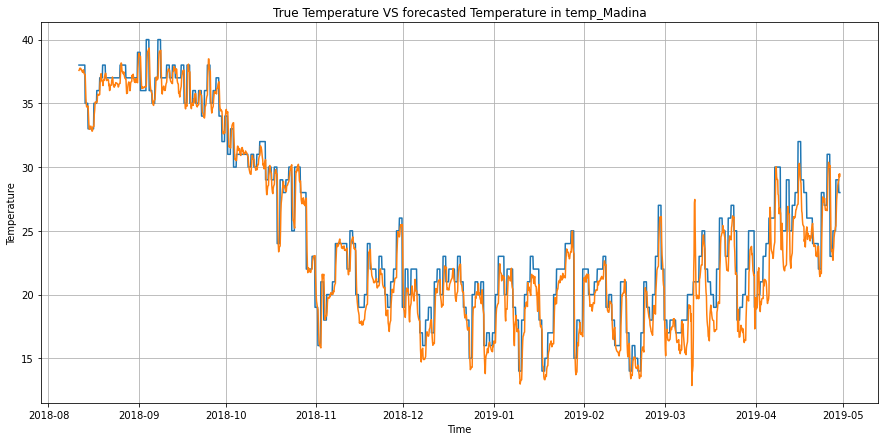

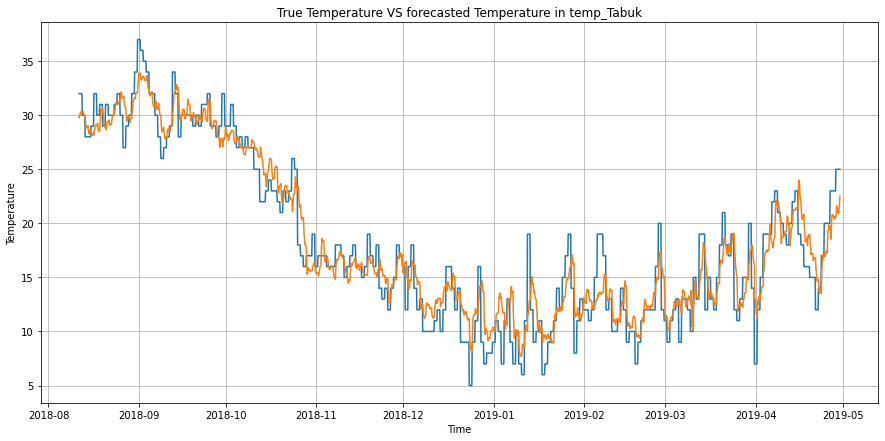

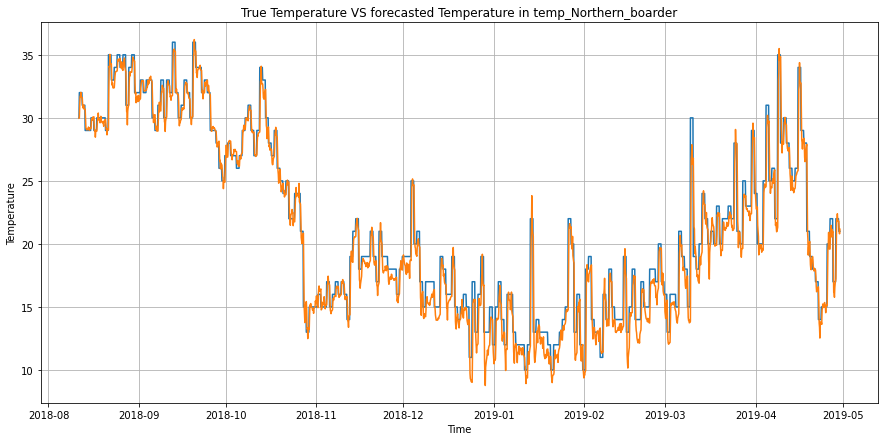

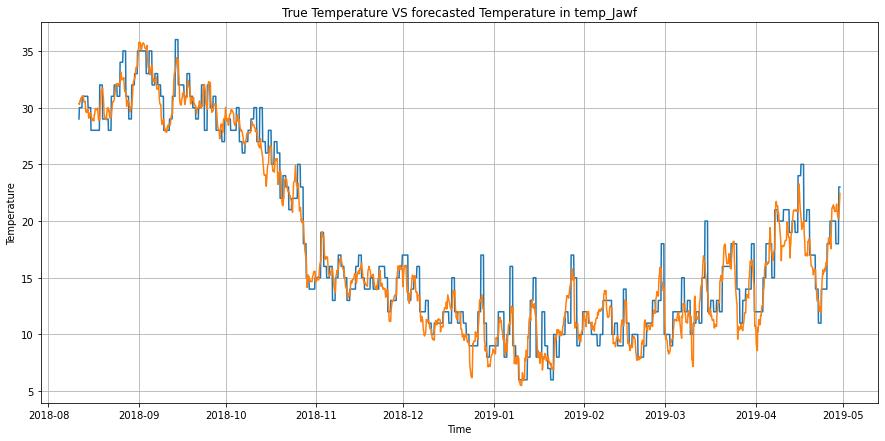

In [36]:
# plot forcasted weather temperature for all cities
for ind, city in enumerate(north_cities_temp.columns):
    plt.figure(figsize=(15, 7))
    plot_series(time_valid, x_valid[:,ind], fig_title=f"True Temperature VS forecasted Temperature in {city}", y_label="Temperature")
    plot_series(time_valid, rnn_forecast_[:,ind], fig_title=f"True Temperature VS forecasted Temperature in {city}", y_label="Temperature")
    plt.show()

In [37]:
# loss/error
for ind, city in enumerate(north_cities_temp.columns):
    print(f"Error of forecasting Temperature in {city} is {tf.keras.metrics.mean_absolute_error(x_valid[:, ind], rnn_forecast_[:,ind]).numpy()}")

Error of forecasting Temperature in temp_Madina is 1.1404887437820435
Error of forecasting Temperature in temp_Tabuk is 1.6587845087051392
Error of forecasting Temperature in temp_Northern_boarder is 0.9120420813560486
Error of forecasting Temperature in temp_Jawf is 1.222507357597351


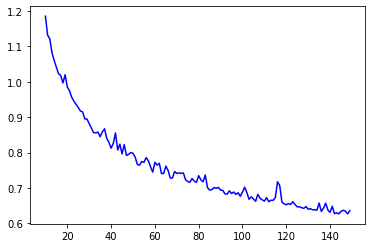

In [38]:
# Plot loss starting from 10th loss
loss = history_m.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

In [39]:
def forecast_by_date(req_date, time_freq):
    # create the new index and a new series full of NaNs
    new_index = pd.date_range(start=df_all_cities.index[-60], end=req_date, freq=time_freq)
    new_series = pd.Series(np.nan, index=new_index)
    comb_series = pd.concat([north_cities_temp.iloc[-60:, :], new_series])
    comb_series = comb_series.iloc[:, 1:]
    print(comb_series.shape[0])
    for i in range(60, comb_series.shape[0]):
        #print(i)
        rnn_forecast = model_forecast_multivariate(model_m, comb_series.iloc[i-60:i,:].values, window_size)
        rnn_forecast[:, -1, :]
        comb_series.iloc[i,:] = rnn_forecast[:, -1, :]
        #print(comb_series.isnull().sum())
    return comb_series

In [40]:
df_forcasted = forecast_by_date(pd.Timestamp("20200723"), '3H') # 2020/07/23 

3720


In [43]:
df_forcasted.head()

,temp_Jawf,temp_Madina,temp_Northern_boarder,temp_Tabuk
2019-04-22 15:00:00,11.0,22.0,14.0,14.0
2019-04-22 18:00:00,11.0,22.0,14.0,14.0
2019-04-22 21:00:00,11.0,22.0,14.0,14.0
2019-04-23 00:00:00,11.0,22.0,14.0,14.0
2019-04-23 03:00:00,11.0,22.0,14.0,14.0
